# Programming for Data Science and Artificial Intelligence

## Supervised Learning - Classification - Decision Trees

## Name: Thantham Khamyai

## Student ID: 122097

### ===Task===

Let's modify the above scratch code to
- Modify the scratch code so it can accept an hyperparameter <code>max_depth</code>, in which it will continue create the tree until max_depth is reached.
- Put everything into a class <code>DecisionTree</code>.  It should have at least two methods, <code>fit()</code>, and <code>predict()</code>
- Load the iris data and try with your class

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Decision Tree Class

In [4]:
class DecisionTree:
    
    
    def __init__(self, max_depth = None):
        
        # If user not put max_depth or put negative depth -> set to infinite
        if (max_depth is None) or (max_depth <1):
            print('{Warning]: max_depth defined is None or less than 1, model will set to no limit')
            self.max_depth = np.inf
        else:
            self.max_depth = max_depth
        
    def fit(self, X, y):
        self.n_classes_ = len(set(y)) # get unique class
        self.n_features_ = X.shape[1] # get number of features
        self.tree_ = self._grow_tree(X, y) # make a tree
    
    def predict(self, X):
        # For each x_test_i -> predict class
        return np.array([self._predict(x_i) for x_i in X])
    
    # Reuseable function to create new Node
    def _grow_tree(self, X, y, depth=0):
        
        # get number sample for each output class
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        
        # get the output class that has largest number of samples
        predicted_class = np.argmax(num_samples_per_class)
        
        # create a Node with that class
        node = self.Node(predicted_class=predicted_class)

        # Check if depth of tree is exceed max_depth
        if depth < self.max_depth:
            
            # Find feature_idx and feature_threshold value from finding best split 
            idx, thr = self._best_split(X, y)
            
            # check if idx exists
            if idx is not None:
                
                # Is it on Left?
                indices_left = X[:, idx] < thr
                
                # Point to the left
                X_left, y_left = X[indices_left], y[indices_left]
                
                # Point to the right (from not left)
                X_right, y_right = X[~indices_left], y[~indices_left]
                
                #  set identity feature at node
                node.feature_index = idx
                
                # set threshold for node
                node.threshold = thr
                
                # continuely grow left and right node
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
                
        return node

    def _predict(self, inputs):
        
        #init tree for prediction
        node = self.tree_
        
        # If next branch exists -> go next branch
        while node.left:
            
            # test on if feature that current node less than threshold 
            if inputs[node.feature_index] < node.threshold:
                
                # go to the left leaf
                node = node.left
            else:
                # go to the right leaf
                node = node.right
                
        return node.predicted_class

    def _best_split(self, X, y):
        
        # get number of samples
        m = y.size
        
        # if no samples more, than exit
        if m <= 1:
            return None, None
        
        # count samples that are each class
        num_parent = [np.sum(y == c) for c in range(self.n_classes_)]
        
        # find gini Index using I_g equation
        best_gini = 1.0 - sum((n / m) ** 2 for n in num_parent)
        
        # init best split indx and threshold value
        best_idx, best_thr = None, None
        
        # looping all features to find best split
        for idx in range(self.n_features_):
            
            # make list of threshold split
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
            
            # make countable list
            num_left = [0] * self.n_classes_
            
            # make init right 
            num_right = num_parent.copy()
            
            # try to calcualate left to right
            for i in range(1, m):
                
                # 
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                
                # gini index on left
                gini_left = 1.0 - sum(
                    (num_left[x] / i) ** 2 for x in range(self.n_classes_)
                )
                # gini index on right
                gini_right = 1.0 - sum(
                    (num_right[x] / (m - i)) ** 2 for x in range(self.n_classes_)
                )
                
                # gini on node
                gini = (i * gini_left + (m - i) * gini_right) / m
                
                #  If out of threshold exists
                if thresholds[i] == thresholds[i - 1]:
                    continue
                    
                # if current gini is better previous
                if gini < best_gini:
                    best_gini = gini # set it as best gini
                    best_idx = idx # set idx for best gini
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2 # calc threshold which is between best split
                    
        return best_idx, best_thr

    # Inner class for Node Generation
    class Node:
        
        def __init__(self, predicted_class):
            
            # Being predicted to be class
            self.predicted_class = predicted_class
            
            # Will test on feature at
            self.feature_index = 0
            
            # With Threshold
            self.threshold = 0
            
            # Connect with Left and Right Node at
            self.left = None
            self.right = None
  


### How to use DecisionTree model

DecisionTree(max_depth = None)

Hyperparameter

* max_depth: int or None (if None or negative, depth will be st to infinite automatically.)

## Perform Decision Tree Classisification on Iris Data

#### Load dataset

In [5]:
from sklearn.datasets import load_iris

dataset = load_iris()
X, y = dataset.data, dataset.target

Try to see what are the scatter will looks like

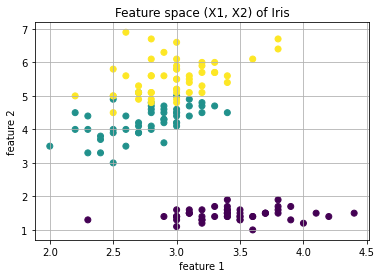

In [6]:
plt.scatter(X[:, 1], X[:, 2], c=y)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Feature space (X1, X2) of Iris')
plt.grid()
plt.show()

However, Decision tree will perform on between values threshold. So, we might not need to normalize the data.

#### Split Data to Train and Test

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=48)

#### Instantiate and Fit The Model

Lets try model

In [8]:
model = DecisionTree(max_depth=5)
model.fit(X_train, y_train)

#### Predict yhat

After fitting model, we futher predict values

In [9]:
y_pred = model.predict(X_test)

The predicted values will looks like this

In [11]:
y_pred[:10]

array([1, 1, 2, 0, 2, 2, 0, 2, 0, 1])

#### Model Evaluation

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.94      0.89      0.91        18
           2       0.88      0.94      0.91        16

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



<br><br><br><br>

### Try on different implementation with infinite depth

In [15]:
model_inf = DecisionTree(max_depth=None)
model_inf.fit(X_train, y_train)
y_pred_inf = model_inf.predict(X_test)
print(classification_report(y_test, y_pred_inf))

{Warning]: max_depth defined is None or less than 1, model will set to no limit
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.94      0.89      0.91        18
           2       0.88      0.94      0.91        16

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45

